Librerias

In [1]:
import os
import scipy.io
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

#CNN
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Dropout
import numpy as np

In [2]:
ruta = "datos mat\Done"

In [3]:
# Parámetros del modelo
input_shape=(385,16)
optimizer_params = {
    'learning_rate': 0.001,    'beta_1': 0.9,    'beta_2': 0.999,    'epsilon': 1e-07,
    'amsgrad': False,    'weight_decay': None,    'clipnorm': None,    'clipvalue': None,
    'global_clipnorm': None,
    'use_ema': False,
    'ema_momentum': 0.99,
    'ema_overwrite_frequency': None,
    'loss_scale_factor': None,
    'gradient_accumulation_steps': None,
    'name': "adam"
}

Funciones

In [4]:
#Obtener los eventos
def get_egg_processed_t(ruta_evento):
    # Cargar datos desde el archivo .mat
    mat_data = loadmat(ruta_evento)

    # Obtener 'eeg_processed' del diccionario cargado
    eeg_processed = mat_data.get('eeg_processed')
    eeg_processed_tensor = tf.convert_to_tensor(eeg_processed)

    return eeg_processed_tensor

In [5]:
def get_event_sujxrun(ruta, sujeto):
    eventos_por_mark = {}

    for subject in os.listdir(ruta):
        if f"Subject {sujeto}" in subject:
            ruta_subj = os.path.join(ruta, subject)
            archivos_suj = os.listdir(ruta_subj)

            for run in range(1, 7):  # Iterar sobre los 6 runs
                for suj in archivos_suj:
                    if f"run_{run}" in suj:  # Corregido para iterar sobre todos los runs
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg_processed_t(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                    if mark not in eventos_por_mark:
                                        eventos_por_mark[mark] = []
                                    eventos_por_mark[mark].append(eeg_processed)
                                    
   
    return eventos_por_mark 

In [6]:
def datos_x_suj(suj):
    events_suj = get_event_sujxrun(ruta, f"{suj}")
    markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
    length_datos = {mark: 0 for mark in events_suj}
    
    for mark, value in events_suj.items():
        if mark in markers:
            markers[mark].extend(value)  
            length_datos[mark] += len(value)
    
    tensorxsuj={}
    
    for key, value in markers.items():
        tensorxsuj[key] = tf.reshape(tf.convert_to_tensor(value), (length_datos[key], 385, 16))
        
    return tensorxsuj, length_datos

In [7]:
def agrupar_all_suj():
    all_markers = None
    all_lengths = {}
    
    for suj in range(1, 7):
        tensorxsuj, length_datos = datos_x_suj(suj)
        
        for marker, tensor in tensorxsuj.items():
            if all_markers is None:
                all_markers = tensor
            else:
                all_markers = tf.concat([all_markers, tensor], axis=0)
            if marker in all_lengths:
                all_lengths[marker] += length_datos[marker]
            else:
                all_lengths[marker] = length_datos[marker]
    
    return all_markers, all_lengths

In [8]:
all_markers, all_lengths = agrupar_all_suj()
print(all_markers.shape)
print(all_lengths)

(2227, 385, 16)
{'Marker_1': 331, 'Marker_2': 393, 'Marker_3': 414, 'Marker_4': 402, 'Marker_5': 392, 'Marker_6': 295}


In [25]:
all_lengths

{'Marker_1': 331,
 'Marker_2': 393,
 'Marker_3': 414,
 'Marker_4': 402,
 'Marker_5': 392,
 'Marker_6': 295}

In [73]:
def all_labels():
    labels_market = {
        "Marker_1": [1, 0, 0, 0, 0, 0],
        "Marker_2": [0, 1, 0, 0, 0, 0],
        "Marker_3": [0, 0, 1, 0, 0, 0],
        "Marker_4": [0, 0, 0, 1, 0, 0],
        "Marker_5": [0, 0, 0, 0, 1, 0],
        "Marker_6": [0, 0, 0, 0, 0, 1]
    }
    
    n_label=[]
    for marker, value in all_lengths.items():  
        label_m = labels_market.get(marker)
        
        labels = [label_m] * value
        for i in labels:
            n_label.append(i)

    return n_label

In [74]:
all_labels()

[[1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0,

In [75]:
labels_usar= all_labels()
inputs_usar= all_markers

MODELO CONV1D

In [55]:
from keras.optimizers import Adam

def conv1d_model(input_shape):
    optimizer = Adam(**optimizer_params)

    model = models.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(2),
        layers.Conv1D(32, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(6, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [56]:
model = conv1d_model(input_shape)


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 383, 64)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 189, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 94, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       192,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,278 (790.15 KB)

 Trainable params: 202,278 (790.15 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
inputs_usar

<tf.Tensor: shape=(2227, 385, 16), dtype=float64, numpy=
array([[[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
         -0.32013615, -0.59905516],
        [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
         -0.09780727, -0.67023779],
        [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
          0.20599897, -0.55113152],
        ...,
        [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
          0.39501937,  0.85777496],
        [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
          0.5060532 ,  0.9429678 ],
        [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
          0.15307825,  0.95560016]],

       [[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
         -0.95876275, -0.23228808],
        [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
         -0.61907484,  0.09356379],
        [ 0.64733311, -0.52450758, -0.32888821, ...,  0.40487155,
         -0.25194263,  0.41252575],
        ..

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split

train_inputs_numpy = inputs_usar.numpy()
train_labels_numpy = labels_usar

# Dividir los datos en conjuntos de entrenamiento y prueba
train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    train_inputs_numpy, train_labels_numpy, test_size=0.2)


In [86]:
train_inputs

array([[[ 0.60837658,  0.23916644, -0.01864785, ..., -0.08833615,
          0.35399081,  0.63346352],
        [ 0.28192699, -0.04290697, -0.26422576, ..., -0.31331845,
          0.11989144,  0.11818802],
        [ 0.25158079, -0.06476959, -0.28989627, ..., -0.26761886,
          0.04951166,  0.10206081],
        ...,
        [ 0.08523448,  0.14205736, -0.00387261, ..., -0.11578603,
          0.08406556, -0.74835623],
        [ 0.10607529,  0.1893261 ,  0.02682342, ..., -0.02094662,
          0.30683162, -0.43406665],
        [ 0.06478489,  0.2118518 ,  0.03778856, ..., -0.0053378 ,
          0.64233985, -0.19245194]],

       [[-1.        , -1.        , -0.50130576, ...,  0.01232756,
         -0.98050024, -1.        ],
        [-0.68659921, -0.62161895, -0.02648531, ...,  0.48035501,
         -0.56332817, -0.34015129],
        [-0.48551624, -0.43961047,  0.23273745, ...,  0.76449429,
         -0.24850508,  0.12239605],
        ...,
        [ 0.01766799,  0.4275121 , -0.54379371, ..., -

In [87]:
train_inputs = np.array(train_inputs)
train_labels = np.array(train_labels)
val_inputs = np.array(val_inputs)
val_labels = np.array(val_labels)

In [88]:
# Entrenamiento del modelo
history = model.fit(train_inputs, train_labels, epochs=50, batch_size=16, validation_data=(val_inputs, val_labels))

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2938 - loss: 1.6710 - val_accuracy: 0.5493 - val_loss: 1.1083
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6352 - loss: 0.9092 - val_accuracy: 0.6413 - val_loss: 0.8327
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7113 - loss: 0.6622 - val_accuracy: 0.6121 - val_loss: 0.8096
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7622 - loss: 0.5344 - val_accuracy: 0.6188 - val_loss: 0.8913
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8164 - loss: 0.4543 - val_accuracy: 0.6480 - val_loss: 0.7791
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8499 - loss: 0.3850 - val_accuracy: 0.6435 - val_loss: 0.7885
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8727 - loss: 0.3137 - val_accuracy: 0.6188 - val_loss: 0.8791
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9096 - loss: 0.2550 - val_accuracy: 0.

In [89]:
def plot_training_history(history, history_s):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

    # Plot training & validation accuracy values from history
    ax1.plot(history.history['accuracy'], label='Train (No Shuffle)', color='blue')
    ax1.plot(history.history['val_accuracy'], label='Val (No Shuffle)', color='green')
    ax1.set_title('Model Accuracy (No Shuffle)')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper left')

    # Plot training & validation accuracy values from history_s
    ax2.plot(history_s.history['accuracy'], label='Train (Shuffle)', color='red')
    ax2.plot(history_s.history['val_accuracy'], label='Val (Shuffle)', color='orange')
    ax2.set_title('Model Accuracy (Shuffle)')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Plot training & validation loss values from history
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(8, 3))

    # Plot training & validation loss values from history
    ax3.plot(history.history['loss'], label='Train (No Shuffle)', color='blue')
    ax3.plot(history.history['val_loss'], label='Val (No Shuffle)', color='green')
    ax3.set_title('Model Loss (No Shuffle)')
    ax3.set_ylabel('Loss')
    ax3.set_xlabel('Epoch')
    ax3.legend(loc='upper left')

    # Plot training & validation loss values from history_s
    ax4.plot(history_s.history['loss'], label='Train (Shuffle)', color='red')
    ax4.plot(history_s.history['val_loss'], label='Val (Shuffle)', color='orange')
    ax4.set_title('Model Loss (Shuffle)')
    ax4.set_ylabel('Loss')
    ax4.set_xlabel('Epoch')
    ax4.legend(loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [91]:
test_loss, test_accuracy = model.evaluate(val_inputs, val_labels) #rendimiento del modelo
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6478 - loss: 2.3068
Test accuracy: 0.652466356754303
Test loss: 2.134110450744629


Shuffle= True

In [92]:
optimizer = Adam(**optimizer_params)

model_st = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    layers.Conv1D(32, 3, activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(6, activation='softmax')])
    
model_st.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model_sf = conv1d_model(input_shape)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [93]:
model_st.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 383, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 191, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 189, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 189, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 94, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        96,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,158 (395.15 KB)

 Trainable params: 101,158 (395.15 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history_st = model_st.fit(train_inputs, train_labels, epochs=50, batch_size=16,shuffle=True, validation_data=(val_inputs, val_labels))

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3406 - loss: 1.6349 - val_accuracy: 0.5538 - val_loss: 1.0902
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6272 - loss: 0.9379 - val_accuracy: 0.6457 - val_loss: 0.8930
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7345 - loss: 0.6618 - val_accuracy: 0.6794 - val_loss: 0.7791
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7637 - loss: 0.5442 - val_accuracy: 0.6749 - val_loss: 0.7464
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8163 - loss: 0.4359 - val_accuracy: 0.6502 - val_loss: 0.7784
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8396 - loss: 0.3886 - val_accuracy: 0.6031 - val_loss: 0.9478
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8605 - loss: 0.3301 - val_accuracy: 0.6592 - val_loss: 0.7491
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9104 - loss: 0.2560 - val_accuracy: 0.

In [95]:
#rendimiento del modelo con shuffle
print("Rendimiento del modelo con shuffle")
test_loss, test_accuracy = model_st.evaluate(val_inputs, val_labels) 
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

#rendimiento del modelo sin shuffle
print("Rendimiento del modelo sin shuffle")
test_loss, test_accuracy = model_sf.evaluate(val_inputs, val_labels) 
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

Rendimiento del modelo con shuffle
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 1.7227 
Test accuracy: 0.665919303894043
Test loss: 1.6794531345367432
Rendimiento del modelo sin shuffle
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1622 - loss: 1.8117
Test accuracy: 0.1704035848379135
Test loss: 1.806636929512024


RED SIMPLE

In [114]:
optimizer = Adam(**optimizer_params)

model_ss = models.Sequential([
    layers.Conv1D(16, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(6, activation='softmax')])
    
model_ss.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [115]:
model_ss.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_19 (Conv1D)              │ (None, 383, 16)        │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 191, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3056)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │        24,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,294 (98.80 KB)

 Trainable params: 25,294 (98.80 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
history_ss = model_ss.fit(train_inputs, train_labels, epochs=50, batch_size=32,shuffle=True, validation_data=(val_inputs, val_labels))

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1759 - loss: 1.8026 - val_accuracy: 0.2309 - val_loss: 1.7745
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2327 - loss: 1.7517 - val_accuracy: 0.2713 - val_loss: 1.7087
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2456 - loss: 1.7231 - val_accuracy: 0.3027 - val_loss: 1.6544
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2756 - loss: 1.6682 - val_accuracy: 0.2982 - val_loss: 1.5960
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2754 - loss: 1.6289 - val_accuracy: 0.3543 - val_loss: 1.5454
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2559 - loss: 1.6090 - val_accuracy: 0.3475 - val_loss: 1.5132
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2772 - loss: 1.5792 - val_accuracy: 0.3610 - val_loss: 1.4902
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2799 - loss: 1.5829 - val_accuracy: 0.3565 - val_loss:

In [118]:
#rendimiento del modelo con shuffle red simple
print("Rendimiento del modelo con shuffle Red Simple")
test_loss, test_accuracy = model_ss.evaluate(val_inputs, val_labels) 
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

Rendimiento del modelo con shuffle Red Simple
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4276 - loss: 1.2999 
Test accuracy: 0.4192825257778168
Test loss: 1.3004333972930908


In [120]:
def plot_training_historyss(history_ss):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot training & validation accuracy and loss values from history and history_s
    ax1.plot(history_ss.history['accuracy'], label='Train Accuracy (Shuffle)', color='blue')
    ax1.plot(history_ss.history['val_accuracy'], label='Val Accuracy (Shuffle)', color='orange')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='lower right')


    ax2.plot(history_ss.history['loss'], label='Train Loss (Shuffle)', color='red')
    ax2.plot(history_ss.history['val_loss'], label='Val Loss (Shuffle)', color='orange')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')
    

    # Show the plot
    plt.tight_layout()
    plt.show()

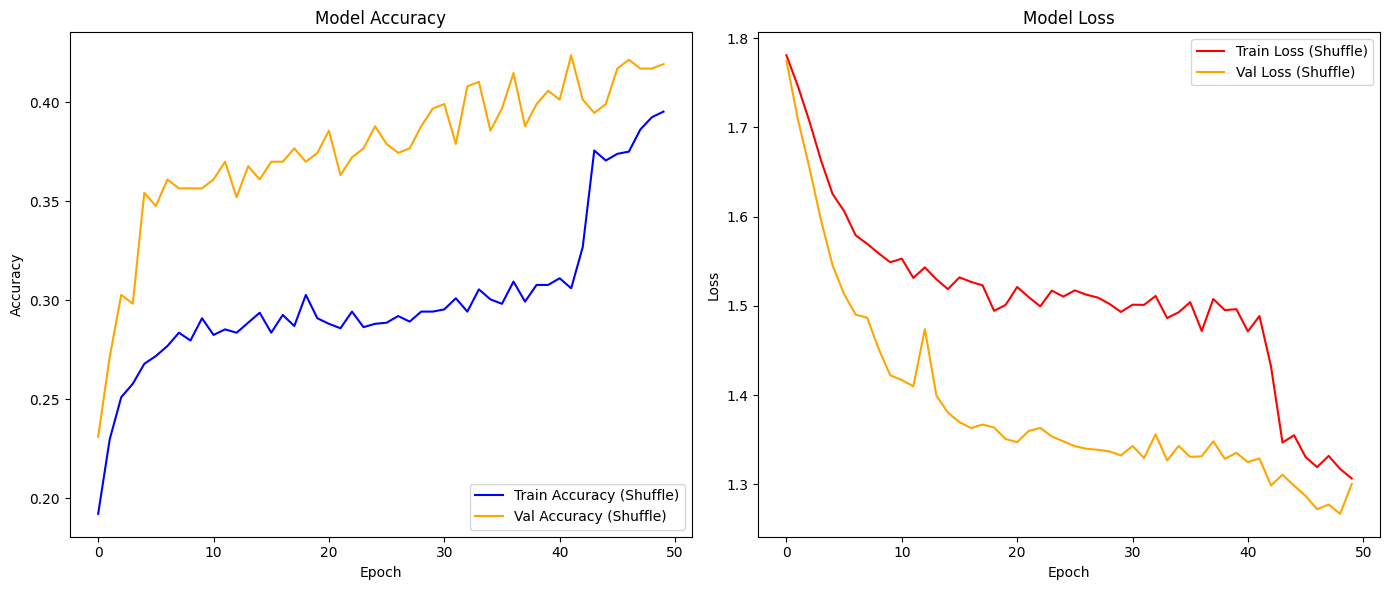

In [121]:
plot_training_historyss(history_ss)

RED COMPLEJA

In [ ]:
#Red compleja, kernel en 512, neuronas 128, dropout 0.2

In [122]:
optimizer = Adam(**optimizer_params)

model_sc = models.Sequential([
    layers.Conv1D(512, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    layers.Conv1D(256, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')])
    
model_sc.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [123]:
model_sc.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 383, 512)       │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 191, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 189, 256)       │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 94, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 24064)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     3,080,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,499,654 (13.35 MB)

 Trainable params: 3,499,654 (13.35 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
history_sc = model_sc.fit(train_inputs, train_labels, epochs=50, batch_size=16,shuffle=True, validation_data=(val_inputs, val_labels))

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.9817 - loss: 0.0597 - val_accuracy: 0.6300 - val_loss: 2.0949
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9045 - loss: 0.3027 - val_accuracy: 0.6435 - val_loss: 1.5363
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.9661 - loss: 0.0920 - val_accuracy: 0.6256 - val_loss: 2.0094
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9804 - loss: 0.0625 - val_accuracy: 0.6592 - val_loss: 2.2179
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9830 - loss: 0.0500 - val_accuracy: 0.6300 - val_loss: 2.0724
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.9815 - loss: 0.0514 - val_accuracy: 0.6547 - val_loss: 2.4348
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9768 - loss: 0.0834 - val_accuracy: 0.5964 - val_loss: 2.0763
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.9788 - loss: 0

In [129]:
#rendimiento del modelo con shuffle red simple
print("Rendimiento del modelo con shuffle Red Compleja")
test_loss, test_accuracy = model_sc.evaluate(val_inputs, val_labels) 
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

Rendimiento del modelo con shuffle Red Compleja
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6333 - loss: 2.5570
Test accuracy: 0.652466356754303
Test loss: 2.379568099975586


In [130]:
def plot_training_historysc(history_sc):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot training & validation accuracy and loss values from history and history_s
    ax1.plot(history_sc.history['accuracy'], label='Train Accuracy (Shuffle)', color='blue')
    ax1.plot(history_sc.history['val_accuracy'], label='Val Accuracy (Shuffle)', color='orange')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='lower right')

    ax2.plot(history_sc.history['loss'], label='Train Loss (Shuffle)', color='red')
    ax2.plot(history_sc.history['val_loss'], label='Val Loss (Shuffle)', color='orange')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')
    

    # Show the plot
    plt.tight_layout()
    plt.show()

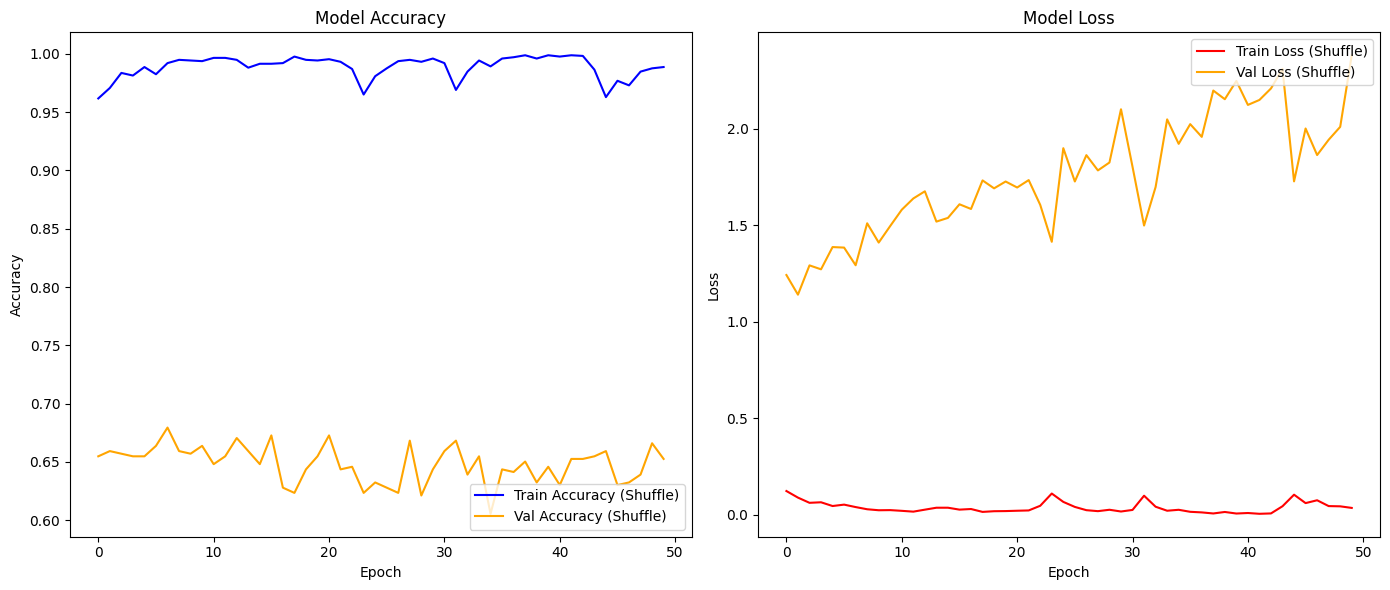

In [131]:
plot_training_historysc(history_sc)